In [44]:
import pandas as pd
import matplotlib.pyplot as plt
columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Earnings"]
data = pd.read_csv("adult.data", header=None, names=columns, index_col=False)
data.head()
data["Sex"].value_counts()
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
a = data.groupby(["Sex"])["Age"].mean()
a.head()

Sex
 Female    36.858230
 Male      39.433547
Name: Age, dtype: float64

In [46]:
US_citizens = data.loc[data["Native-country"] == ' United-States', 'Native-country'].count()
citizens = data["Native-country"].count()
print("Proportion = {}".format(US_citizens / citizens))

Proportion = 0.895857006848684


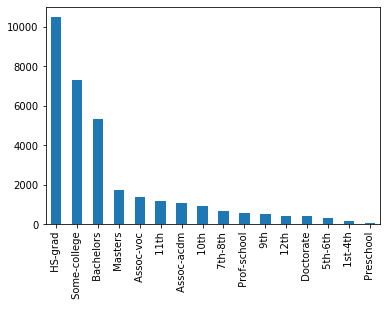

In [47]:
education = data["Education"].value_counts()
education.plot.bar()

In [48]:
std_fnlwgt = data[data["Marital-status"] == " Divorced"]["fnlwgt"].std()
print("Standard deviation of the final weight for divorced people = {}".format(std_fnlwgt))
mean_fnlwgt = data[data["Marital-status"] == " Divorced"]["fnlwgt"].mean()
print("Mean of the final weight for divorced people = {}".format(mean_fnlwgt))

Standard deviation of the final weight for divorced people = 105646.78945933598
Mean of the final weight for divorced people = 185802.79045689848


In [49]:
ed_num_over50 = data[data["Earnings"] == " >50K"]["Education-num"].mean()
ed_num_under50 = data[data["Earnings"] == " <=50K"]["Education-num"].mean()
print(ed_num_over50 > ed_num_under50)

True


In [50]:
data.groupby(["Sex", "Race"]).Age.max()

Sex      Race               
 Female   Amer-Indian-Eskimo    80
          Asian-Pac-Islander    75
          Black                 90
          Other                 74
          White                 90
 Male     Amer-Indian-Eskimo    82
          Asian-Pac-Islander    90
          Black                 90
          Other                 77
          White                 90
Name: Age, dtype: int64

In [51]:
data[data["Occupation"] == " Farming-fishing"]["Native-country"].value_counts()

 United-States    879
 Mexico            77
 Puerto-Rico        5
 ?                  5
 Guatemala          4
 Philippines        4
 Canada             2
 Italy              2
 El-Salvador        2
 Cuba               2
 Vietnam            2
 Germany            1
 Yugoslavia         1
 England            1
 France             1
 Japan              1
 Poland             1
 Ireland            1
 Cambodia           1
 Portugal           1
 Hong               1
Name: Native-country, dtype: int64

In [66]:
males = data[data["Sex"] == " Male"]
males_bach = males.loc[males["Education"] == ' Bachelors', 'Education'].count()
males_masters = males.loc[males["Education"] == ' Masters', 'Education'].count()
print("The ratio of the number of male bachelors to male masters = {}".format(males_bach / males_masters))

The ratio of the number of male bachelors to male masters = 3.14743049705139


In [68]:
females = data[data["Sex"] == " Female"]
females_bach = females.loc[females["Education"] == ' Bachelors', 'Education'].count()
females_masters = females.loc[females["Education"] == ' Masters', 'Education'].count()
print("The ratio of the number of female bachelors to female masters = {}".format(females_bach / females_masters))
print("Males ratio > females ratio is {}".format((males_bach / males_masters) > (females_bach / females_masters)))

The ratio of the number of female bachelors to female masters = 3.0205223880597014
Males ratio > females ratio is True


The number of people who work hard is 85


Text(0.5, 1.0, 'How much do hard workers earn?')

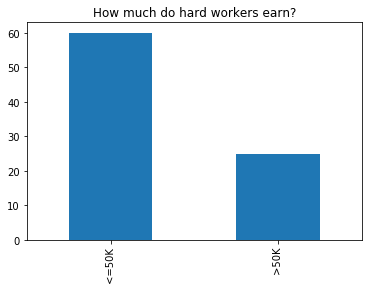

In [86]:
max_hours = data["Hours-per-week"].max()
hard_workers = data.loc[data["Hours-per-week"] == max_hours, "Earnings"]
print("The number of people who work hard is {}".format(hard_workers.count()))
hard_workers.value_counts()
hard_workers.value_counts().plot.bar()
plt.title("How much do hard workers earn?")